Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Registration started
Global and Local Registration
:: Load two point clouds with initial pose.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.300.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.300.
:: Apply global registration with distance threshold 0.850
Iteration Index: 0, Scale Index: 0, Scale Iteration Index: 0, Fitness: 1.0, Inlier RMSE: 0.19001591815773278,
Iteration Index: 1, Scale Index: 0, Scale Iteration Index: 1, Fitness: 1.0, Inlier RMSE: 0.15887422277585275,
Iteration Index: 2, Scale Index: 0, Scale Iteration Index: 2, Fitness: 1.0, Inlier RMSE: 0.14916358769270105,
Iteration Index: 3, Scale Index: 0, Scale Iteration Index: 3, Fitness: 1.0, Inl

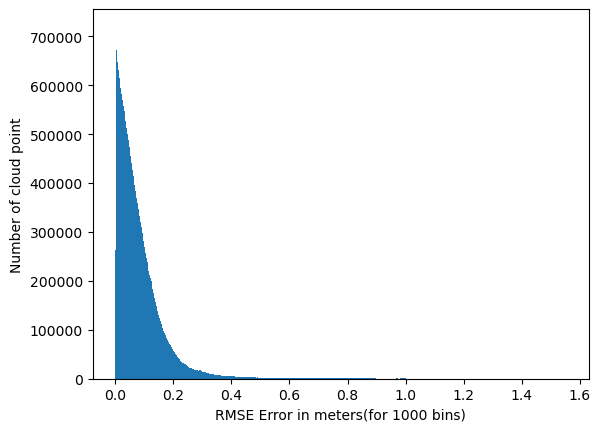

Histogram Log Scale


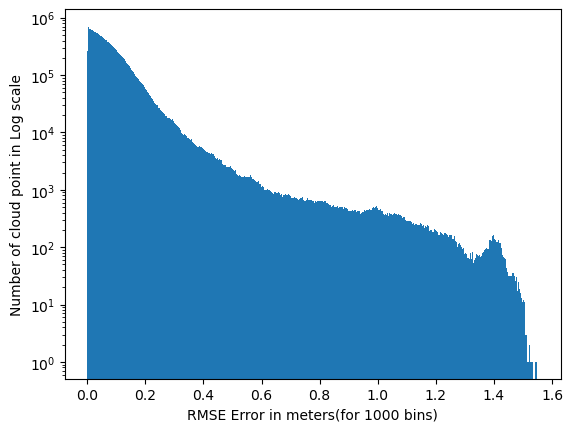

Final Transformation Matrix [[ 0.92882732 -0.02391283  0.02747091  3.24358448]
 [ 0.02490799  0.92859042 -0.03385389  2.09128584]
 [-0.02657191  0.03456401  0.92851813  0.38375557]
 [ 0.          0.          0.          1.        ]]
Global and Local Registration
:: Load two point clouds with initial pose.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.300.
:: Downsample with a voxel size 0.100.
:: Estimate normal with search radius 0.200.
:: Compute FPFH feature with search radius 0.300.
:: Apply global registration with distance threshold 0.850
Iteration Index: 0, Scale Index: 0, Scale Iteration Index: 0, Fitness: 1.0, Inlier RMSE: 0.12138138339299845,
Iteration Index: 1, Scale Index: 0, Scale Iteration Index: 1, Fitness: 1.0, Inlier RMSE: 0.11937364628372309,
Iteration Index: 2, Scale Index: 0, Scale Iteration Index: 2, Fitness: 1.0, Inlier RMSE: 0.11793903210835842,
Iteration Index: 3, Scale Index: 0, 

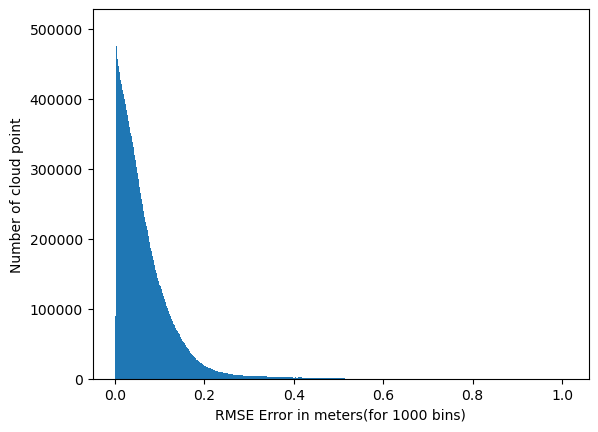

Histogram Log Scale


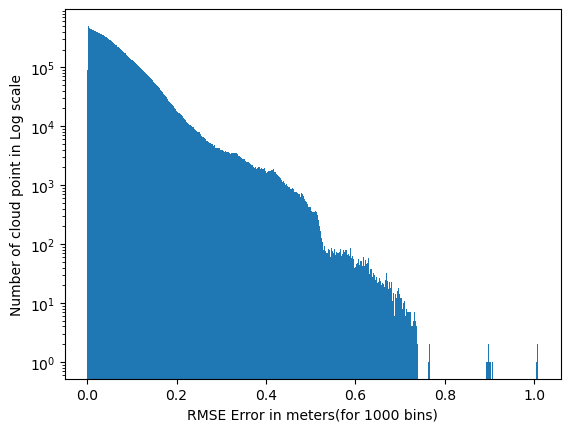

Final Transformation Matrix [[ 0.96667655 -0.04274679  0.04149063 -1.19706   ]
 [ 0.04337939  0.96743776 -0.01395433 -3.63670076]
 [-0.04082878  0.01578627  0.9675206   2.6546962 ]
 [ 0.          0.          0.          1.        ]]
Registration DONE
CAMERA DATA Preproccesing Done


In [18]:
import numpy as np
import vis_camera
import camera
import numpy as np
import os
import shutil
import preprocess_dataset
transformed_camera_sets = preprocess_dataset.camera_transformation()

In [23]:
camera_14, camera_15, camera_16, cam14cls, cam15cls, cam16cls = transformed_camera_sets
camera_14 = np.asarray(camera_14, dtype="object")
camera_15 = np.asarray(camera_15, dtype="object")
camera_16 = np.asarray(camera_16, dtype="object")
cam14cls = np.asarray(cam14cls, dtype="object")
cam15cls = np.asarray(cam15cls, dtype="object")
cam16cls = np.asarray(cam16cls, dtype="object")
cam15cls[0].transformation_matrix, cam15cls[0].shift

(array([[ 0.92882732, -0.02391283,  0.02747091,  3.24358448],
        [ 0.02490799,  0.92859042, -0.03385389,  2.09128584],
        [-0.02657191,  0.03456401,  0.92851813,  0.38375557],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([ 332400., 8375600.,       0.]))

In [7]:
import camera
def desc3dlocal_to_global(camera_ref, num_worker = 8):
    start_step = 0
    step = (len(camera_ref.camera_dict)/num_worker)
    step_list = []
    for idx in range(num_worker):
        if idx==num_worker-1:
            step_list.append([int(start_step), int(len(camera_ref.camera_dict))])
        else:
            step_list.append([int(start_step), int(start_step+step)])
            start_step = start_step+step
    print("Total cameras",len(camera_ref.camera_dict),"Step List",step_list)
    return step_list
camera14_xml = "/home/turin/Desktop/lizard_dataset_curated/2014/cam14.xml"
opencv_xml = "/home/turin/Desktop/lizard_dataset_curated/opencv_cam_calib.xml"
camera_ref14 = camera.CameraRef(camera14_xml, opencv_xml)
step_list = desc3dlocal_to_global(camera_ref14, 16)
step_list[0]

Total cameras 1600 Step List [[0, 100], [100, 200], [200, 300], [300, 400], [400, 500], [500, 600], [600, 700], [700, 800], [800, 900], [900, 1000], [1000, 1100], [1100, 1200], [1200, 1300], [1300, 1400], [1400, 1500], [1500, 1600]]


[0, 100]

In [45]:
import time
import numpy as np
from pyproj import CRS
from pyproj import Transformer
import camera
import Metashape


camera14_xml = "/home/turin/Desktop/lizard_dataset_curated/2014/cam14.xml"
camera15_xml = "/home/turin/Desktop/lizard_dataset_curated/2015/cam15.xml"
camera16_xml = "/home/turin/Desktop/lizard_dataset_curated/2016/cam16.xml"
opencv_xml = "/home/turin/Desktop/lizard_dataset_curated/opencv_cam_calib.xml"
project_path14 = "/home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx"
project_path15 = "/home/turin/Desktop/lizard_island/jackson/chronological/2015/r20151207_222558_lizard_d2_039_horseshoe_circle01/r20151207_222558_lizard_d2_039_horseshoe_circle01.psx"
project_path16 = "/home/turin/Desktop/lizard_island/jackson/chronological/2016/r20161121_063027_lizard_d2_050_horseshoe_circle01/r20161121_063027_lizard_d2_050_horseshoe_circle01.psx"
camera_ref14 = camera.CameraRef(camera14_xml, opencv_xml)
camera_ref15 = camera.CameraRef(camera15_xml, opencv_xml)
camera_ref16 = camera.CameraRef(camera16_xml, opencv_xml)

####
# camera_ref =
# project_path =
# transform = np.eye(4,4)
# shift = np.asarray([332400, 8375600, 0.0])
####
def metashape_descriptors(project_path):
    doc = Metashape.Document()
    doc.open(project_path)
    chunk = doc.chunk
    cameras = chunk.cameras
    #Get all tie points
    point_cloud = chunk.tie_points
    #Get camera projections of the tie points
    projections = point_cloud.projections
    #Get the points
    points = point_cloud.points
    #Sift descriptors
    desc_points = {}
    #Iterate over all camera
    for cam in cameras:
        desc_2D3D = {}
        sift_points = []
        #3D point per 2D sift points
        pcd_3d_points = []
        for proj in projections[cam]:
            #Append all 2D
            sift_points.append(proj.coord)
            #Append all 3D
            pcd_3d_points.append(cam.unproject(proj.coord))
        desc_2D3D["2D"] = sift_points
        desc_2D3D["3D"] = pcd_3d_points
        desc_points[cam.label]=desc_2D3D
    return desc_points
    #############################




    ##############################
    # for idx in range(2):#range(len(camera_ref14.camera_dict)):
    #     start = time.time()
    #     camera14 = camera.Camera(camera_ref14.camera_dict[idx], camera_ref14.local2global, shift=shift)
    #     point2d = desc_points[camera14.camera_id]["2D"]
    #     point3d = desc_points[camera14.camera_id]["3D"]
    #     new_point3d= []
    #     end = time.time()
    #     print(str(end-start))
    #     for pts in point3d:
    #         xyz14 = np.hstack([np.asarray(pts), 1.0])
    #         xyz14global = camera_ref14.local2global @ xyz14
    #         ####LOCAL TO GLOBAL
    #         xyz_crs4978 = xyz14global
    #         crs4978 = CRS.from_epsg(4978)
    #         crs32755 = CRS.from_epsg(32755)
    #         proj = Transformer.from_crs(crs4978, crs32755)
    #         xyz_crs4978[0,:3] = proj.transform(xyz_crs4978[0,0], xyz_crs4978[0,1], xyz_crs4978[0,2])
    #         xyz_crs4978 = np.asarray(xyz_crs4978).squeeze()
    #         xyz_crs4978[0] -= shift[0]
    #         xyz_crs4978[1] -= shift[1]
    #         xyz_crs4978[2] -= shift[2]
    #         xyz_transformed = transform@xyz_crs4978
    #         new_point3d.append(xyz_transformed)
    #     desc_points[camera14.camera_id]["3D"] = new_point3d
    #     camera14_set.append([camera14.get_camera_set(), desc_points[camera14.camera_id]])

desc14 = metashape_descriptors(project_path14)
desc15 = metashape_descriptors(project_path15)
desc16 = metashape_descriptors(project_path16)

LoadProject: path = /home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx
loaded project in 0.000276 sec


Document.open(): The document is opened in read-only mode because it is already in use.


LoadProject: path = /home/turin/Desktop/lizard_island/jackson/chronological/2015/r20151207_222558_lizard_d2_039_horseshoe_circle01/r20151207_222558_lizard_d2_039_horseshoe_circle01.psx
loaded project in 0.000453 sec
LoadProject: path = /home/turin/Desktop/lizard_island/jackson/chronological/2016/r20161121_063027_lizard_d2_050_horseshoe_circle01/r20161121_063027_lizard_d2_050_horseshoe_circle01.psx
loaded project in 0.000459 sec


In [94]:
def desc3dlocal_to_global(desc_points, camera_ref, num_worker = 8):
    start_step = 0
    step = (len(camera_ref.camera_dict)/num_worker)
    step_list = []
    for idx in range(num_worker):
        if idx==num_worker-1:
            step_list.append([int(start_step), int(len(camera_ref.camera_dict))])
        else:
            step_list.append([int(start_step), int(start_step+step)])
            start_step = start_step+step
    print("Total cameras",len(camera_ref.camera_dict),"Step List",step_list)
    return step_list
step_list14 = desc3dlocal_to_global(desc14, camera_ref14, 14)
step_list15 = desc3dlocal_to_global(desc15, camera_ref15, 14)
step_list16 = desc3dlocal_to_global(desc16, camera_ref16, 14)
print(f"step list: {step_list14}, step_list2: {step_list15}")

Total cameras 1600 Step List [[0, 114], [114, 228], [228, 342], [342, 457], [457, 571], [571, 685], [685, 800], [800, 914], [914, 1028], [1028, 1142], [1142, 1257], [1257, 1371], [1371, 1485], [1485, 1600]]
Total cameras 1234 Step List [[0, 88], [88, 176], [176, 264], [264, 352], [352, 440], [440, 528], [528, 616], [616, 705], [705, 793], [793, 881], [881, 969], [969, 1057], [1057, 1145], [1145, 1234]]
Total cameras 1348 Step List [[0, 96], [96, 192], [192, 288], [288, 385], [385, 481], [481, 577], [577, 674], [674, 770], [770, 866], [866, 962], [962, 1059], [1059, 1155], [1155, 1251], [1251, 1348]]
step list: [[0, 114], [114, 228], [228, 342], [342, 457], [457, 571], [571, 685], [685, 800], [800, 914], [914, 1028], [1028, 1142], [1142, 1257], [1257, 1371], [1371, 1485], [1485, 1600]], step_list2: [[0, 88], [88, 176], [176, 264], [264, 352], [352, 440], [440, 528], [528, 616], [616, 705], [705, 793], [793, 881], [881, 969], [969, 1057], [1057, 1145], [1145, 1234]]


In [92]:
step_list = [[0,2]]
camera_ref = camera_ref15
transform = cam15cls[0].transformation_matrix
shift = cam15cls[0].shift
desc_points = desc15

In [93]:
import time
import threading
import multiprocessing
import concurrent.futures
def run(start, end):
    xyz = {}
    for idx in range(start, end, 1):
        camera_cls = camera.Camera(camera_ref.camera_dict[idx], camera_ref.local2global, shift=shift)
        point2d = desc_points[camera_cls.camera_id]["2D"]
        point3d = desc_points[camera_cls.camera_id]["3D"]
        new_point3d= []
        for pts in point3d:
            xyz14 = np.hstack([np.asarray(pts), 1.0])
            xyz14global = camera_ref.local2global @ xyz14
            ####LOCAL TO GLOBAL
            xyz_crs4978 = xyz14global
            crs4978 = CRS.from_epsg(4978)
            crs32755 = CRS.from_epsg(32755)
            proj = Transformer.from_crs(crs4978, crs32755)
            xyz_crs4978[0,:3] = proj.transform(xyz_crs4978[0,0], xyz_crs4978[0,1], xyz_crs4978[0,2])
            xyz_crs4978 = np.asarray(xyz_crs4978).squeeze()
            xyz_crs4978[0] -= shift[0]
            xyz_crs4978[1] -= shift[1]
            xyz_crs4978[2] -= shift[2]
            xyz_transformed = transform@xyz_crs4978
            new_point3d.append(xyz_transformed)
        #desc_points[camera14.camera_id]["3D"] = new_point3d
        xyz[camera_cls.camera_id] = new_point3d
    return xyz
def multi_process():
    with concurrent.futures.ProcessPoolExecutor() as executor:
        results = [executor.submit(run, sec1, sec2) for sec1, sec2 in step_list]
    final_result = []
    i = 0
    for result in results:
        print(i)
        final_result.append(result.result())
        i+=1
    return final_result

start = time.time()
point3d_global14 = multi_process()
end = time.time()
print(str(end-start))

0
115.4043972492218


In [95]:
import pickle
data_test3d = open("data3d.pickle", "wb")
pickle.dump(final_result, data_test3d)
data_test3d.close()

In [31]:
# class MyThread(threading.Thread):
#     def __init__(self, camera_ref14, desc_points, start_step, end_step, transform, shift):
#         self.camera_ref14 = camera_ref14
#         self.desc_points = desc_points
#         self.start_step = start_step
#         self.end_step = end_step
#         self.transform = transform
#         self.shift = shift
#         threading.Thread.__init__(self)
#
#     def run(self):
#         for idx in range(self.start_step, self.end_step, 1):
#             global camera14_set
#             camera14 = camera.Camera(camera_ref14.camera_dict[idx], camera_ref14.local2global, shift=shift)
#             point2d = self.desc_points[camera14.camera_id]["2D"]
#             point3d = self.desc_points[camera14.camera_id]["3D"]
#             new_point3d= []
#
#             for pts in point3d:
#                 xyz14 = np.hstack([np.asarray(pts), 1.0])
#                 xyz14global = camera_ref14.local2global @ xyz14
#                 ####LOCAL TO GLOBAL
#                 xyz_crs4978 = xyz14global
#                 crs4978 = CRS.from_epsg(4978)
#                 crs32755 = CRS.from_epsg(32755)
#                 proj = Transformer.from_crs(crs4978, crs32755)
#                 xyz_crs4978[0,:3] = proj.transform(xyz_crs4978[0,0], xyz_crs4978[0,1], xyz_crs4978[0,2])
#                 xyz_crs4978 = np.asarray(xyz_crs4978).squeeze()
#                 xyz_crs4978[0] -= self.shift[0]
#                 xyz_crs4978[1] -= self.shift[1]
#                 xyz_crs4978[2] -= self.shift[2]
#                 xyz_transformed = self.transform@xyz_crs4978
#                 new_point3d.append(xyz_transformed)
#             self.desc_points[camera14.camera_id]["3D"] = new_point3d
#             camera14_set.append([camera14.get_camera_set(), self.desc_points[camera14.camera_id]])

In [11]:
import time
import numpy as np
from pyproj import CRS
from pyproj import Transformer
import camera
import Metashape


camera14_xml = "/home/turin/Desktop/lizard_dataset_curated/2014/cam14.xml"
camera15_xml = "/home/turin/Desktop/lizard_dataset_curated/2015/cam15.xml"
camera16_xml = "/home/turin/Desktop/lizard_dataset_curated/2016/cam16.xml"
opencv_xml = "/home/turin/Desktop/lizard_dataset_curated/opencv_cam_calib.xml"
project_path14 = "/home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx"
camera_ref14 = camera.CameraRef(camera14_xml, opencv_xml)
camera_ref15 = camera.CameraRef(camera15_xml, opencv_xml)

doc = Metashape.Document()
doc.open(project_path14)
chunk = doc.chunk
cameras = chunk.cameras
#Get all tie points
point_cloud = chunk.tie_points
#Get camera projections of the tie points
projections = point_cloud.projections
#Get the points
points = point_cloud.points
#Sift descriptors
desc_points = {}
#Iterate over all camera
for cam in cameras:
    desc_2D3D = {}
    sift_points = []
    #3D point per 2D sift points
    pcd_3d_points = []
    for proj in projections[cam]:
        #Append all 2D
        sift_points.append(proj.coord)
        #Append all 3D
        pcd_3d_points.append(cam.unproject(proj.coord))
    desc_2D3D["2D"] = sift_points
    desc_2D3D["3D"] = pcd_3d_points
    desc_points[cam.label]=desc_2D3D
transform = np.eye(4,4)
shift = np.asarray([332400, 8375600, 0.0])

LoadProject: path = /home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx
loaded project in 0.000216 sec


Document.open(): The document is opened in read-only mode because it is already in use.


In [13]:
len(camera_ref15.camera_dict)

1234

In [17]:
camera14_set = []
start_step = 0
step = (len(camera_ref15.camera_dict)/13)
step_list = []
for _ in range(13):
    step_list.append([int(start_step), int(start_step+step)])
    start_step = start_step+step
step_list

[[0, 94],
 [94, 189],
 [189, 284],
 [284, 379],
 [379, 474],
 [474, 569],
 [569, 664],
 [664, 759],
 [759, 854],
 [854, 949],
 [949, 1044],
 [1044, 1139],
 [1139, 1234]]

In [3]:
import time
import threading
import multiprocessing
import concurrent.futures
start = time.perf_counter()

def run(start, end):
    xyz = {}
    for idx in range(start, end, 1):
        camera14 = camera.Camera(camera_ref14.camera_dict[idx], camera_ref14.local2global, shift=shift)
        point2d = desc_points[camera14.camera_id]["2D"]
        point3d = desc_points[camera14.camera_id]["3D"]
        new_point3d= []
        for pts in point3d:
            xyz14 = np.hstack([np.asarray(pts), 1.0])
            xyz14global = camera_ref14.local2global @ xyz14
            ####LOCAL TO GLOBAL
            xyz_crs4978 = xyz14global
            crs4978 = CRS.from_epsg(4978)
            crs32755 = CRS.from_epsg(32755)
            proj = Transformer.from_crs(crs4978, crs32755)
            xyz_crs4978[0,:3] = proj.transform(xyz_crs4978[0,0], xyz_crs4978[0,1], xyz_crs4978[0,2])
            xyz_crs4978 = np.asarray(xyz_crs4978).squeeze()
            xyz_crs4978[0] -= shift[0]
            xyz_crs4978[1] -= shift[1]
            xyz_crs4978[2] -= shift[2]
            xyz_transformed = transform@xyz_crs4978
            new_point3d.append(xyz_transformed)
        #desc_points[camera14.camera_id]["3D"] = new_point3d
        xyz[camera14.camera_id] = new_point3d
    return xyz
start = time.time()
with concurrent.futures.ProcessPoolExecutor() as executor:
    results = [executor.submit(run, sec1, sec2) for sec1, sec2 in step_list]
end = time.time()
print(str(end-start))

7944.9297749996185


In [10]:
final_result = []
i = 0
for result in results:
    print(i)
    final_result.append(result.result())
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [14]:
import pickle
data_test3d = open("data3d.pickle", "wb")
pickle.dump(final_result, data_test3d)
data_test3d.close()

In [15]:
final_result[0]

{'PR_20141102_074954_230_LC16.png': [array([48.5014554 , 56.8508069 ,  0.89067642,  1.        ]),
  array([48.49824891, 56.84582304,  0.8912408 ,  1.        ]),
  array([48.50042171, 56.84840812,  0.89081174,  1.        ]),
  array([48.50168441, 56.8476897 ,  0.89043168,  1.        ]),
  array([48.50565215, 56.85233735,  0.88964387,  1.        ]),
  array([48.50060492, 56.84545284,  0.89058878,  1.        ]),
  array([48.50329916, 56.84848205,  0.89004637,  1.        ]),
  array([48.50583167, 56.8502677 ,  0.88947403,  1.        ]),
  array([48.5061558 , 56.85058109,  0.88940577,  1.        ]),
  array([48.51806896, 56.86502768,  0.88706934,  1.        ]),
  array([48.5028542 , 56.8456543 ,  0.88999895,  1.        ]),
  array([48.50776999, 56.8499494 ,  0.88893679,  1.        ]),
  array([48.51637532, 56.85632765,  0.8870103 ,  1.        ]),
  array([48.48769117, 56.85698473,  0.89472198,  1.        ]),
  array([48.50136562, 56.86995146,  0.8918273 ,  1.        ]),
  array([48.49040957

In [129]:
mai()
camera14_set

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
import threading
import multiprocessing
import numpy as np
import time


import time
import numpy as np
from pyproj import CRS
from pyproj import Transformer
import camera
import Metashape


camera14_xml = "/home/turin/Desktop/lizard_dataset_curated/2014/cam14.xml"
camera15_xml = "/home/turin/Desktop/lizard_dataset_curated/2015/cam15.xml"
camera16_xml = "/home/turin/Desktop/lizard_dataset_curated/2016/cam16.xml"
opencv_xml = "/home/turin/Desktop/lizard_dataset_curated/opencv_cam_calib.xml"
project_path14 = "/home/turin/Desktop/lizard_jackson/chronological/2014/r20141102_074952_lizard_d2_081_horseshoe_circle01/r20141102_074952_lizard_d2_081_horseshoe_circle01.psx"
camera_ref14 = camera.CameraRef(camera14_xml, opencv_xml)

doc = Metashape.Document()
doc.open(project_path14)
chunk = doc.chunk
cameras = chunk.cameras
#Get all tie points
point_cloud = chunk.tie_points
#Get camera projections of the tie points
projections = point_cloud.projections
#Get the points
points = point_cloud.points
#Sift descriptors
desc_points = {}
#Iterate over all camera
for cam in cameras:
    desc_2D3D = {}
    sift_points = []
    #3D point per 2D sift points
    pcd_3d_points = []
    for proj in projections[cam]:
        #Append all 2D
        sift_points.append(proj.coord)
        #Append all 3D
        pcd_3d_points.append(cam.unproject(proj.coord))
    desc_2D3D["2D"] = sift_points
    desc_2D3D["3D"] = pcd_3d_points
    desc_points[cam.label]=desc_2D3D

transform = np.eye(4,4)
shift = np.asarray([332400, 8375600, 0.0])
camera14_set = []